In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [4]:
file_path = r"C:\Users\Admin\Desktop\BTL_BigData\data\dataset_1761666182405\ecommerce_dataset_updated.csv"
df = pd.read_csv(file_path)

print("Đọc dữ liệu thành công!")
print(f"Kích thước dữ liệu: {df.shape}")
print("\n5 dòng đầu tiên:")
display(df.head())

Đọc dữ liệu thành công!
Kích thước dữ liệu: (3660, 8)

5 dòng đầu tiên:


,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [5]:
print("\nThông tin tổng quan dữ liệu:")
print(df.info())

print("\nThống kê mô tả:")
display(df.describe(include='all'))


Thông tin tổng quan dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB
None

Thống kê mô tả:


,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
count,3660,3660,3660,3660.000000,3660.000000,3660.000000,3660,3660
unique,3660,3660,7,NaN,NaN,NaN,5,326
top,e73ad07c,a5d07442-d,Home & Kitchen,NaN,NaN,NaN,Credit Card,21-08-2024
freq,1,1,549,NaN,NaN,NaN,760,21
mean,NaN,NaN,NaN,254.800675,18.825137,206.906579,NaN,NaN
std,NaN,NaN,NaN,141.682621,14.731338,122.687844,NaN,NaN
min,NaN,NaN,NaN,10.090000,0.000000,5.890000,NaN,NaN
25%,NaN,NaN,NaN,134.012500,5.000000,104.512500,NaN,NaN
50%,NaN,NaN,NaN,253.845000,15.000000,199.185000,NaN,NaN
75%,NaN,NaN,NaN,377.595000,25.000000,304.117500,NaN,NaN


In [6]:
print("\nSố lượng giá trị bị thiếu trong từng cột:")
print(df.isnull().sum())


Số lượng giá trị bị thiếu trong từng cột:
User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64


In [6]:
if 'Discount (%)' in df.columns:
    df['Discount (%)'] = df['Discount (%)'].fillna(0)
if 'Payment_Method' in df.columns:
    df['Payment_Method'] = df['Payment_Method'].fillna('Unknown')

In [7]:
for col in ['Price (Rs.)', 'Final_Price(Rs.)']:
    if col in df.columns:
        df[col] = df[col].astype(float)

if 'Purchase_Date' in df.columns:
    df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

In [8]:
for col in ['Category', 'Payment_Method']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

In [9]:
if 'TotalPrice' not in df.columns:
    if 'Price (Rs.)' in df.columns and 'Discount (%)' in df.columns:
        df['TotalPrice'] = df['Price (Rs.)'] * (1 - df['Discount (%)'] / 100)

if 'Purchase_Date' in df.columns:
    df['Month'] = df['Purchase_Date'].dt.month
    df['Year'] = df['Purchase_Date'].dt.year

In [10]:
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)
print(f"\n🧹 Đã xóa {before - after} dòng trùng lặp.")


🧹 Đã xóa 0 dòng trùng lặp.


In [11]:
os.makedirs("data", exist_ok=True)
output_path = os.path.join("data", "ecommerce_cleaned.csv")
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"💾 Dữ liệu sạch đã được lưu tại: {output_path}")

💾 Dữ liệu sạch đã được lưu tại: data\ecommerce_cleaned.csv


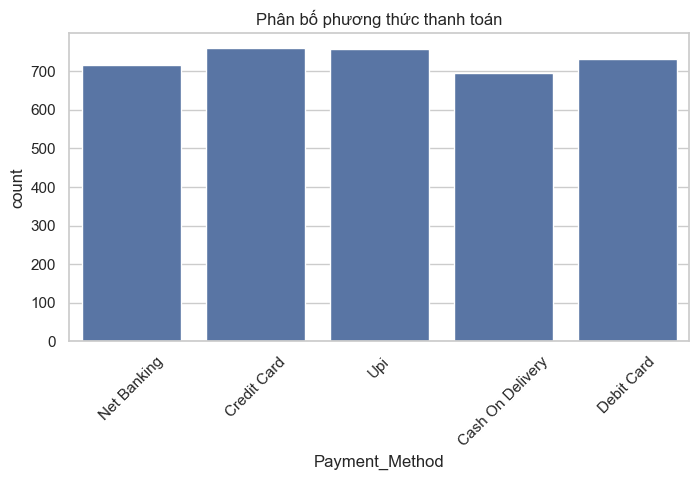

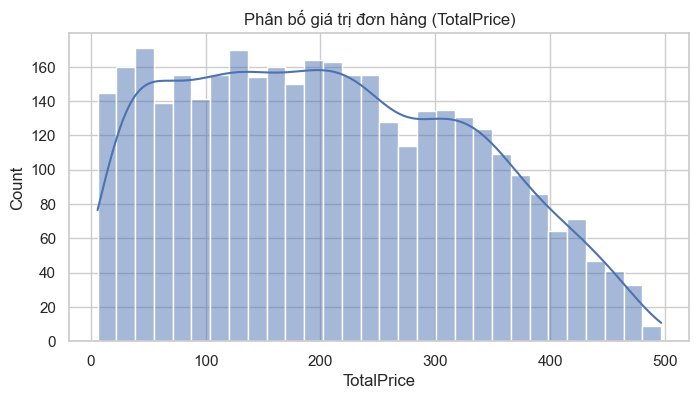

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Payment_Method', data=df)
plt.title("Phân bố phương thức thanh toán")
plt.xticks(rotation=45)
plt.show()

if 'TotalPrice' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['TotalPrice'], bins=30, kde=True)
    plt.title("Phân bố giá trị đơn hàng (TotalPrice)")
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22188\3628173345.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Final_Price(Rs.)', data=monthly_spending, palette="crest")


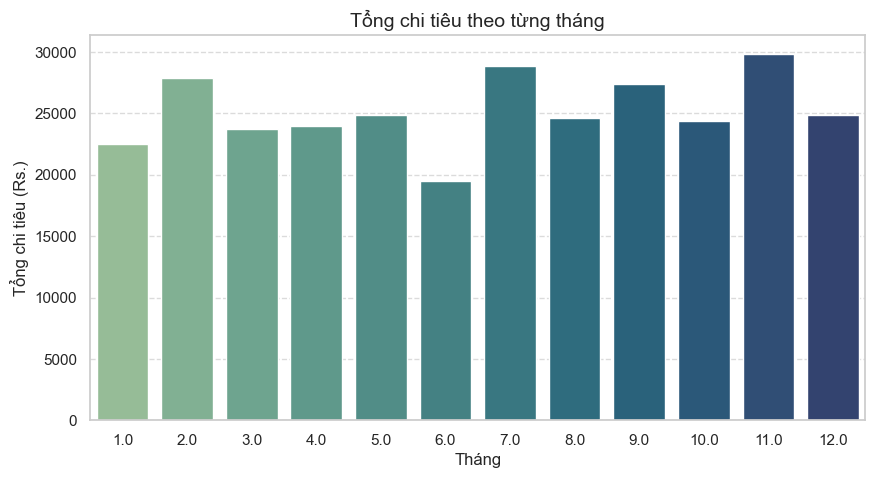

In [ ]:
# --- 13. Biểu đồ tổng chi tiêu theo tháng ---

df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
df['Month'] = df['Purchase_Date'].dt.month
monthly_spending = df.groupby('Month')['Final_Price(Rs.)'].sum().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Final_Price(Rs.)', data=monthly_spending, palette="crest")

plt.title("Tổng chi tiêu theo từng tháng", fontsize=14)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Tổng chi tiêu (Rs.)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
